### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE,ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold,GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,mean_squared_error,classification_report


### import dataset

In [2]:
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

### check null values

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#set mean value for NaN values
df[['Loan_Amount_Term','LoanAmount']] = df[['Loan_Amount_Term','LoanAmount']].fillna(value=df[['Loan_Amount_Term','LoanAmount']].mean())
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# drop other all NaN values
df1 = df.dropna()
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df1.shape

(511, 13)

### check duplicate values

In [8]:
df1.duplicated().sum()

0

In [9]:
df1['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [10]:
df2 = df1.replace(['3+'],3)
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [11]:
df2['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [12]:
df2['Dependents'].value_counts()

0    294
2     88
1     85
3     44
Name: Dependents, dtype: int64

### identify outliers

<AxesSubplot:>

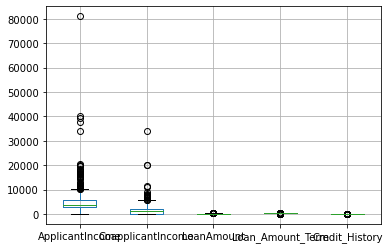

In [13]:
df2.iloc[:,:].boxplot()

In [14]:
data = df2[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] #take quentitative variables
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
Q1

ApplicantIncome      2885.5
CoapplicantIncome       0.0
LoanAmount            100.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.25, dtype: float64

In [16]:
IQR = Q3-Q1

In [17]:
Out_row = ((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)# get the out liers tow index as true
#eka value ekakhari outlier ekak nm e index eka outlier ekak vdhta denwa
Out_row

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610     True
611    False
612    False
613     True
Length: 511, dtype: bool

In [18]:
df3= df2[~Out_row] #set the correct rows as a ture and get these rows
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.000000,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


<AxesSubplot:>

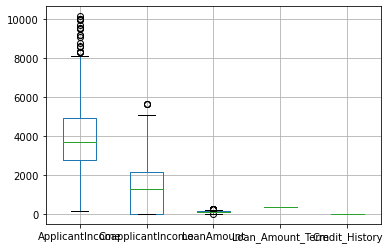

In [19]:
df3.iloc[:,:].boxplot()

In [20]:
df5 = df3.copy()
df5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.000000,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


### convert categorical variables to numerical

In [21]:
le_gen= LabelEncoder()
df5['Gender_n']=le_gen.fit_transform(df5.Gender)

le_marri= LabelEncoder()
df5['Married_n']=le_marri.fit_transform(df5.Married)

le_edu= LabelEncoder()
df5['Education_n']=le_edu.fit_transform(df5.Education)

le_se= LabelEncoder()
df5['Self_Employed_n']=le_se.fit_transform(df5.Self_Employed)

le_pa= LabelEncoder()
df5['Property_Area_n']=le_pa.fit_transform(df5.Property_Area)

In [22]:
df5['Gender_n']=le_gen.fit_transform(df5.Gender)
gender_mapping = dict(zip(le_gen.classes_, le_gen.transform(le_gen.classes_)))
gender_mapping

{'Female': 0, 'Male': 1}

In [23]:
df5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_n,Married_n,Education_n,Self_Employed_n,Property_Area_n
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,2
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,1,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,1,0,2
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.000000,360.0,1.0,Rural,Y,1,1,1,0,0
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y,1,1,0,0,0
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0,0,0,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,1,1,0,0,2


In [24]:
df4 =df5.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area'],axis = 1)
df4

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_n,Married_n,Education_n,Self_Employed_n,Property_Area_n
0,0,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,2
1,1,4583,1508.0,128.000000,360.0,1.0,N,1,1,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,Y,1,1,0,1,2
3,0,2583,2358.0,120.000000,360.0,1.0,Y,1,1,1,0,2
4,0,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
607,2,3987,1411.0,157.000000,360.0,1.0,Y,1,1,1,0,0
608,0,3232,1950.0,108.000000,360.0,1.0,Y,1,1,0,0,0
609,0,2900,0.0,71.000000,360.0,1.0,Y,0,0,0,0,0
611,1,8072,240.0,253.000000,360.0,1.0,Y,1,1,0,0,2


### define x,y

In [25]:
x = df4.drop(['Loan_Status'],axis = 1)
y =df4.Loan_Status

### check data imbalancing

In [26]:
y.value_counts()

Y    263
N     58
Name: Loan_Status, dtype: int64

In [27]:
smt = SMOTE()
x_asy, y_asy = smt.fit_resample(x, y)

In [28]:
y_asy.value_counts()

Y    263
N    263
Name: Loan_Status, dtype: int64

In [29]:
x_asy

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_n,Married_n,Education_n,Self_Employed_n,Property_Area_n
0,0.0,5849,0.000000,146.412162,360.0,1.0,1,0,0,0,2
1,1.0,4583,1508.000000,128.000000,360.0,1.0,1,1,0,0,0
2,0.0,3000,0.000000,66.000000,360.0,1.0,1,1,0,1,2
3,0.0,2583,2358.000000,120.000000,360.0,1.0,1,1,1,0,2
4,0.0,6000,0.000000,141.000000,360.0,1.0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
521,0.0,4258,2465.149672,117.554486,360.0,1.0,1,1,0,0,2
522,0.0,5070,3585.538414,188.317017,360.0,1.0,0,1,0,0,1
523,0.0,4045,2505.203186,138.938989,360.0,1.0,0,1,0,0,2
524,0.19901,3192,0.000000,80.368314,360.0,1.0,0,0,0,0,2


In [30]:
y_asy

0      Y
1      N
2      Y
3      Y
4      Y
      ..
521    N
522    N
523    N
524    N
525    N
Name: Loan_Status, Length: 526, dtype: object

In [31]:
?LogisticRegression

In [32]:
?RandomForestClassifier

In [33]:
?KNeighborsClassifier

### check best model by cross validation

In [34]:
a = cross_val_score(SVC(),x_asy,y_asy)
np.average(a)

0.6007008086253369

In [35]:
b = cross_val_score(RandomForestClassifier(n_estimators=100),x_asy,y_asy)
np.average(b)

0.81581311769991

In [36]:
c= cross_val_score(LogisticRegression(solver='lbfgs',multi_class='auto',C = 1),x_asy,y_asy)
np.average(c)

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.6559748427672956

In [37]:
d = cross_val_score(GaussianNB(),x_asy,y_asy)
np.average(d)

0.6522551662174305

### check best model by Gridsearch

In [38]:
folds = StratifiedKFold(n_splits = 5)

In [39]:
model_params = {
    'knearest': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,5,10],
            'weights': ['uniform', 'distance']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [40,50,60,100,120],
            'criterion': ['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            #'C': [1,3,5,6,8]
            'C': [1,5,8]
        },

    }
}

In [40]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv= 3, return_train_score=False)
    clf.fit(x_asy,y_asy)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_n = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_n

,model,best_score,best_params
0,knearest,0.766126,"{'n_neighbors': 5, 'weights': 'distance'}"
1,random_forest,0.813820,"{'criterion': 'gini', 'n_estimators': 50}"
2,logistic_regression,0.671180,{'C': 5}


#### best model is RandomForestClassifier.

### split data into train & test sets

In [41]:
x_train,x_test,y_train,y_test= train_test_split(x_asy,y_asy,test_size = 0.3)

### build model

In [42]:
model = RandomForestClassifier(n_estimators=120,criterion='gini')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8227848101265823

In [43]:
y_predicted = model.predict(x_test)
y_predicted 

array(['N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N'], dtype=object)

###  function to predict loan eligibility

In [44]:
x_asy.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_n', 'Married_n',
       'Education_n', 'Self_Employed_n', 'Property_Area_n'],
      dtype='object')

In [57]:
x_asy.dtypes

Dependents            object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Gender_n               int32
Married_n              int32
Education_n            int32
Self_Employed_n        int32
Property_Area_n        int32
dtype: object

In [45]:
gender_mapping = dict(zip(le_gen.classes_, le_gen.transform(le_gen.classes_)))
gender_mapping
#df5['Gender_n']=le_gen.fit_transform(df5.Gender)

{'Female': 0, 'Male': 1}

In [47]:
Property_Area_mapping = dict(zip(le_pa.classes_, le_pa.transform(le_pa.classes_)))
Property_Area_mapping

{'Rural': 0, 'Semiurban': 1, 'Urban': 2}

In [48]:
def predict_loan_eligibility(Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area):    
    
    x = np.zeros(len(x_asy.columns))
    x[0] = Dependents
    x[1] = ApplicantIncome
    x[2] = CoapplicantIncome
    x[3] = LoanAmount
    x[4] = Loan_Amount_Term
    x[5] = Credit_History
    x[6] = 0 if Gender =='Female' else 1
    x[7] = 0 if Married == 'No' else 1
    x[8] = 0 if Education == 'Graduate' else 1
    x[9] = 0 if Self_Employed == 'No' else 1
    x[10] = 0 if Property_Area =='Rural' else (1 if Property_Area =='Semiurban' else 2)
    
    return model.predict([x])[0]

In [49]:
predict_loan_eligibility(1,4583,1508.0,128.000000,360.0,1.0,'Male','Yes','Graduate','No','Rural')
#predict_loan_eligibility(1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0)

G:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'N'

### confusion metrix

In [50]:
cm = metrics.confusion_matrix(y_test,y_predicted)
cm

array([[68, 10],
       [18, 62]], dtype=int64)

### heat map

Text(0.5, 1.0, 'Accuracy score:0.8227848101265823')

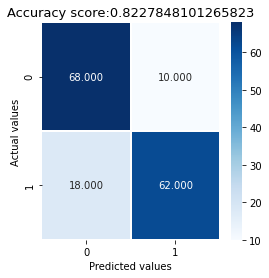

In [51]:
score = model.score(x_test,y_test)
plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidth = .5, cmap = 'Blues')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
topic = 'Accuracy score:{0}'.format(score)
plt.title(topic,size = 13)

### classification report

In [52]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           N       0.79      0.87      0.83        78
           Y       0.86      0.78      0.82        80

    accuracy                           0.82       158
   macro avg       0.83      0.82      0.82       158
weighted avg       0.83      0.82      0.82       158



### other measures

In [53]:
#accuracy
accuracy_score(y_test,y_predicted) 

0.8227848101265823

In [54]:
#error rate
1-accuracy_score(y_test,y_predicted)

0.17721518987341767

### Export the tested model to a pickle file

In [55]:
import pickle
with open('loan_approval_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

### Export location and column information to a file

In [56]:
#show column details
import json
columns = {
    'data_columns' : [col.lower() for col in x_asy.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))